In [17]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)

# column dict 
column_dict={'ID':'id',
             ' Large B/P ':'bp_large',
             ' Large ROE ':'roe_large',
             ' Large S/P ':'sp_large',
             ' Large Return Rate in the last quarter ':'ror_large_last_quarter',
             ' Large Market Value ':'mv_large',
             ' Small systematic Risk':'systematic_risk_small',
             'Annual Return':'annual_return',
             'Excess Return':'excess_return',
             'Systematic Risk':'systemtic_risk_actual',
             'Total Risk':'total_risk',
             'Abs. Win Rate':'abs_win_rate',
             'Rel. Win Rate':'relative_win_rate',
             'Annual Return.1':'annual_return_norm',
             'Excess Return.1':'excess_return_norm',
             'Systematic Risk.1':'systemtic_risk_actual_norm',
             'Total Risk.1':'total_risk_norm',
             'Abs. Win Rate.1':'abs_win_rate_norm',
             'Rel. Win Rate.1':'relative_win_rate_norm'}
# sort by key dict
#sorted(column_dict.items(), key=lambda kv: column_dict[kv[0]])
# key by value - example 'bp_large'
#[k for k,v in column_dict.items() if v == 'bp_large']

# MultiIndex
mId=pd.IndexSlice

Python 3.8.3
numpy version: 1.19.5
pandas version:  1.0.5


# Loading data - Stock Portfolio Performance

The dataset of performances of weighted scoring stock portfolios are obtained with mixture design from the US stock market historical database.

Dataset source (UCI Machine Learning Repository): https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance

Dataset download link: stock portfolio performance data set.xlsx

In [18]:
# Read all sheets 
total_sheets=6

#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00390/stock%20portfolio%20performance%20data%20set.xlsx
data_file_link_xlsx='https://archive.ics.uci.edu/ml/machine-learning-databases/00390/stock%20portfolio%20performance%20data%20set.xlsx'

# sheet list
sheet_list=list()

for sheet in range(total_sheets-1):
  # Read dataset 
  sheet_list.append(pd.read_excel(data_file_link_xlsx,sheet_name=sheet,header=1))

# 3d dataframe 
data3d=pd.concat(sheet_list,axis=0,keys=['sheet_'+str(sheet) for sheet in range(total_sheets)])
# rename columns 
data3d.rename(index=None,columns=column_dict,axis=None,copy=True,inplace=True)
# see
data3d.head(3)

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_0 0   1       1.0        0.0       0.0                     0.0   
        1   2       0.0        1.0       0.0                     0.0   
        2   3       0.0        0.0       1.0                     0.0   

           mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_0 0       0.0                    0.0       0.019516       0.013399   
        1       0.0                    0.0       0.023829       0.006410   
        2       0.0                    0.0       0.080282       0.026548   

           systemtic_risk_actual  total_risk  abs_win_rate  relative_win_rate  \
sheet_0 0               1.902608    0.218617          0.60               0.40   
        1               1.263287    0.128740          0.55               0.65   
        2               1.894339    0.208272          0.55               0.50   

           annual_return_norm  excess_return_norm  systemtic_risk_actual_norm  \
sheet_0 0            0.488229            0.609445                    0.780756   
        1            0.505279            0.508169                    0.443776   
        2            0.728484            0.800000                    0.776397   

           total_risk_norm  abs_win_rate_norm  relative_win_rate_norm  
sheet_0 0         0.800000               0.68                0.333333  
        1         0.414220               0.56                0.666667  
        2         0.755594               0.56                0.466667

In [7]:
data3d.head(10)

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_0 0   1       1.0        0.0       0.0                     0.0   
        1   2       0.0        1.0       0.0                     0.0   
        2   3       0.0        0.0       1.0                     0.0   
        3   4       0.0        0.0       0.0                     1.0   
        4   5       0.0        0.0       0.0                     0.0   
        5   6       0.0        0.0       0.0                     0.0   
        6   7       0.5        0.5       0.0                     0.0   
        7   8       0.5        0.0       0.5                     0.0   
        8   9       0.0        0.5       0.5                     0.0   
        9  10       0.5        0.0       0.0                     0.5   

           mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_0 0       0.0                    0.0       0.019516       0.013399   
        1       0.0                    0.0       0.023829       0.006410   
        2       0.0                    0.0       0.080282       0.026548   
        3       0.0                    0.0      -0.006683       0.000728   
        4       1.0                    0.0       0.021999       0.004407   
        5       0.0                    1.0      -0.053382      -0.014856   
        6       0.0                    0.0       0.061851       0.016324   
        7       0.0                    0.0       0.061700       0.023370   
        8       0.0                    0.0       0.078232       0.019665   
        9       0.0                    0.0       0.068515       0.019034   

           systemtic_risk_actual  total_risk  abs_win_rate  relative_win_rate  \
sheet_0 0               1.902608    0.218617          0.60               0.40   
        1               1.263287    0.128740          0.55               0.65   
        2               1.894339    0.208272          0.55               0.50   
        3               1.425454    0.155526          0.55               0.35   
        4               1.094579    0.106729          0.65               0.70   
        5               0.859995    0.088858          0.40               0.30   
        6               1.392192    0.144132          0.55               0.65   
        7               1.939118    0.218238          0.60               0.50   
        8               1.354462    0.137681          0.55               0.70   
        9               1.524957    0.162835          0.55               0.40   

           annual_return_norm  excess_return_norm  systemtic_risk_actual_norm  \
sheet_0 0            0.488229            0.609445                    0.780756   
        1            0.505279            0.508169                    0.443776   
        2            0.728484            0.800000                    0.776397   
        3            0.384640            0.425836                    0.529253   
        4            0.498046            0.479146                    0.354852   
        5            0.200000            0.200000                    0.231205   
        6            0.655613            0.651840                    0.511721   
        7            0.655017            0.753942                    0.800000   
        8            0.720381            0.700258                    0.491833   
        9            0.681960            0.691107                    0.581700   

           total_risk_norm  abs_win_rate_norm  relative_win_rate_norm  
sheet_0 0         0.800000               0.68                0.333333  
        1         0.414220               0.56                0.666667  
        2         0.755594               0.56                0.466667  
        3         0.529196               0.56                0.266667  
        4         0.319743               0.80                0.733333  
        5         0.243037               0.20                0.200000  
        6         0.480288               0.56                0.666667  
        7         0.7

### long term 

In [19]:
# See down trends - top three from bottom 
ltm_worse_three_idx=data3d.loc['sheet_4'].sort_values('annual_return',ascending=True).index[:3]
ltm_worse_three=data3d.loc['sheet_4'].sort_values('annual_return',ascending=True).id.values[:3]
print('worse_three',ltm_worse_three)

# See down trends - top three from top 
ltm_best_three_idx=data3d.loc['sheet_4'].sort_values('annual_return',ascending=False).index[:3]
ltm_best_three=data3d.loc['sheet_4'].sort_values('annual_return',ascending=False).id.values[:3]
print('best_three',ltm_best_three)

data3d.loc[mId['sheet_4',ltm_worse_three_idx],data3d.columns[:10]]

worse_three [ 6 41 16]
best_three [ 7 22 42]


id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_4 5    6       0.0        0.0       0.0                   0.000   
        15  16       0.0        0.0       0.0                   0.500   
        40  41       0.0        0.0       0.0                   0.333   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_4 5      0.000                  1.000           0.07         -0.005   
        15     0.500                  0.000           0.09         -0.001   
        40     0.333                  0.333           0.09          0.000   

            systemtic_risk_actual  
sheet_4 5                    1.10  
        15                   1.15  
        40                   1.13

In [20]:
data3d.loc[mId['sheet_4',ltm_best_three_idx],data3d.columns[:10]]

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_4 6    7     0.500      0.500     0.000                    0.00   
        21  22     0.333      0.333     0.333                    0.00   
        41  42     0.250      0.250     0.250                    0.25   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_4 6        0.0                    0.0          0.195          0.026   
        21       0.0                    0.0          0.192          0.024   
        41       0.0                    0.0          0.191          0.024   

            systemtic_risk_actual  
sheet_4 6                    0.97  
        21                   1.08  
        41                   1.06

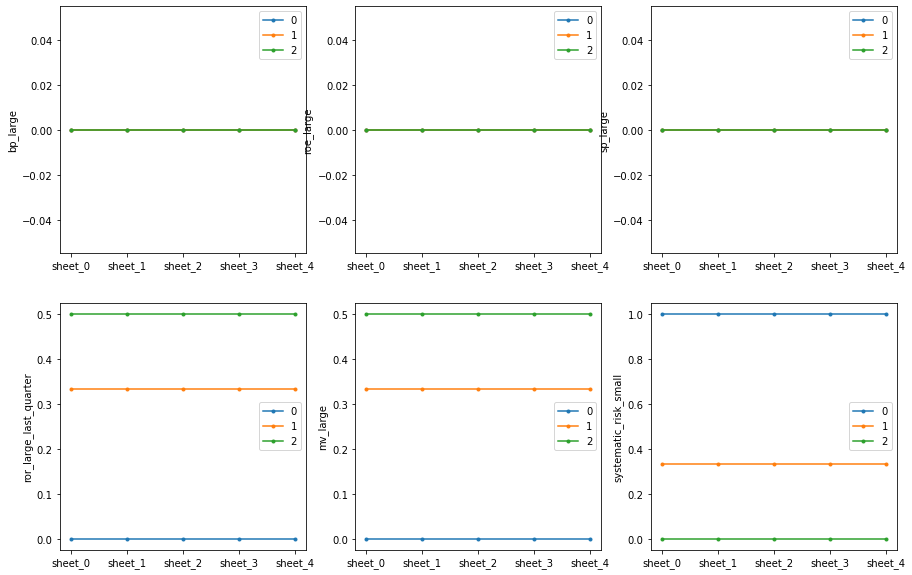

In [21]:
# plot 20 years data for worse three
plt.figure(figsize=(15,10))

# plot trends 
# x - axis
x_axis=['sheet_'+str(x) for x in range(total_sheets-1)]

for n_plot,column in enumerate(data3d.columns[1:7],1):
  plt.subplot(2,3,n_plot)
  # y - axis
  y_axis_all=[data3d.loc[pd.IndexSlice[:,ltm_worse_three_idx[y]],column].values for y in range(3)]
  # plot
  for n,y_axis in enumerate(y_axis_all,0):
    plt.plot(x_axis,y_axis,label=str(n),marker='.')
  plt.legend(),plt.ylabel(column)

plt.show()

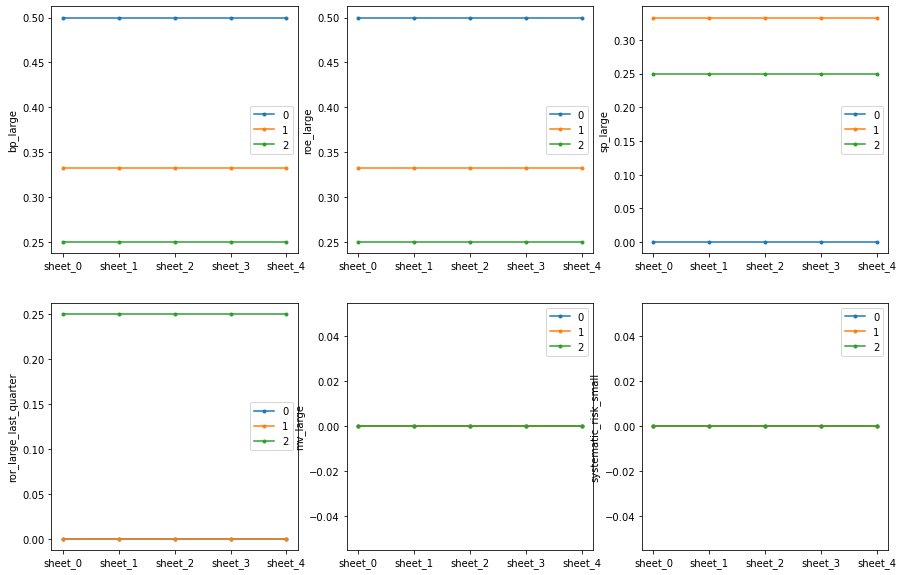

In [22]:
# plot 20 years data for best three
plt.figure(figsize=(15,10))

# plot trends 
# x - axis
x_axis=['sheet_'+str(x) for x in range(total_sheets-1)]
# 
for n_plot,column in enumerate(data3d.columns[1:7],1):
  plt.subplot(2,3,n_plot)
  # y - axis
  y_axis_all=[data3d.loc[pd.IndexSlice[:,ltm_best_three_idx[y]],column].values for y in range(3)]
  # plot
  for n,y_axis in enumerate(y_axis_all,0):
    plt.plot(x_axis,y_axis,label=str(n),marker='.')
  plt.legend(),plt.ylabel(column)

plt.show()

### sort term 

In [23]:
# See down trends - top three from bottom 
stm_worse_three_idx=data3d.sort_values('annual_return',ascending=True).index[:3]
stm_worse_three=data3d.sort_values('annual_return',ascending=True).id.values[:3]
print('worse_three',stm_worse_three)

# See down trends - top three from top 
stm_best_three_idx=data3d.sort_values('annual_return',ascending=False).index[:3]
stm_best_three=data3d.sort_values('annual_return',ascending=False).id.values[:3]
print('best_three',stm_best_three)

data3d.loc[mId[stm_worse_three_idx],data3d.columns[:10]]

worse_three [ 6 17 16]
best_three [22  7  3]


id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_0 5    6       0.0        0.0       0.0                     0.0   
        16  17       0.5        0.0       0.0                     0.0   
sheet_1 15  16       0.0        0.0       0.0                     0.5   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_0 5        0.0                    1.0      -0.053382      -0.014856   
        16       0.0                    0.5      -0.023439      -0.006177   
sheet_1 15       0.5                    0.0      -0.007220       0.004897   

            systemtic_risk_actual  
sheet_0 5                0.859995  
        16               0.977325  
sheet_1 15               1.141957

In [24]:
data3d.loc[mId[stm_best_three_idx],data3d.columns[:10]]

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_1 21  22     0.333      0.333     0.333                     0.0   
        6    7     0.500      0.500     0.000                     0.0   
        2    3     0.000      0.000     1.000                     0.0   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_1 21       0.0                    0.0       0.300086       0.073955   
        6        0.0                    0.0       0.297516       0.071642   
        2        0.0                    0.0       0.295726       0.076156   

            systemtic_risk_actual  
sheet_1 21               1.067218  
        6                0.902055  
        2                1.316862

### sort term, minumum risk 

In [25]:
data3d.sort_values(['annual_return','systemtic_risk_actual'],ascending=False).head()

id  bp_large  roe_large  sp_large  ror_large_last_quarter  \
sheet_1 21  22     0.333      0.333     0.333                     0.0   
        6    7     0.500      0.500     0.000                     0.0   
        2    3     0.000      0.000     1.000                     0.0   
sheet_3 6    7     0.500      0.500     0.000                     0.0   
        21  22     0.333      0.333     0.333                     0.0   

            mv_large  systematic_risk_small  annual_return  excess_return  \
sheet_1 21       0.0                    0.0       0.300086       0.073955   
        6        0.0                    0.0       0.297516       0.071642   
        2        0.0                    0.0       0.295726       0.076156   
sheet_3 6        0.0                    0.0       0.294884       0.024584   
        21       0.0                    0.0       0.290061       0.022651   

            systemtic_risk_actual  total_risk  abs_win_rate  \
sheet_1 21               1.067218    0.120580          0.85   
        6                0.902055    0.102550          0.80   
        2                1.316862    0.147754          0.65   
sheet_3 6                1.060690    0.064909          0.90   
        21               1.091540    0.071344          0.80   

            relative_win_rate  annual_return_norm  excess_return_norm  \
sheet_1 21               0.85            0.800000            0.781465   
        6                0.85            0.794983            0.761993   
        2                0.85            0.791489            0.800000   
sheet_3 6                0.70            0.800000            0.777744   
        21               0.75            0.778624            0.745203   

            systemtic_risk_actual_norm  total_risk_norm  abs_win_rate_norm  \
sheet_1 21                    0.371233         0.458673           0.800000   
        6                     0.233249         0.318102           0.714286   
        2                     0.579796         0.670530           0.457143   
sheet_3 6                     0.462267         0.460149           0.800000   
        21                    0.491525         0.549004           0.560000   

            relative_win_rate_norm  
sheet_1 21                   0.725  
        6                    0.725  
        2                    0.725  
sheet_3 6                    0.650  
        21                   0.725

### predection - long term 

In [26]:
data3d.columns

Index(['id', 'bp_large', 'roe_large', 'sp_large', 'ror_large_last_quarter',
       'mv_large', 'systematic_risk_small', 'annual_return', 'excess_return',
       'systemtic_risk_actual', 'total_risk', 'abs_win_rate',
       'relative_win_rate', 'annual_return_norm', 'excess_return_norm',
       'systemtic_risk_actual_norm', 'total_risk_norm', 'abs_win_rate_norm',
       'relative_win_rate_norm'],
      dtype='object')

### get data

In [27]:
# data (input) ['bp_large','roe_large','sp_large','ror_large_last_quarter','mv_large','systematic_risk_small']
in_names=['bp_large','roe_large','sp_large','ror_large_last_quarter','mv_large','systematic_risk_small']
X=data3d.loc[mId['sheet_4',:],data3d.columns[1:7]].values  # sort term - X=data3d.loc[mId['sheet_0':'sheet_3',:],data3d.columns[1:7]].values

# labels (to predict) ['annual_return','excess_return','total_risk']
outs_name=['annual_return','excess_return','total_risk']
y=data3d.loc[mId['sheet_4',:],['annual_return','excess_return','total_risk']].values # sort term - y=data3d.loc[mId['sheet_0':'sheet_3',:],['annual_return','excess_return','total_risk']].values

X.shape,y.shape
#output--6 rows given in in_names

((63, 6), (63, 3))

### normalize and split

In [28]:
# import function 
from sklearn.preprocessing import normalize
# doc -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

X_norm,norms_of_x=normalize(X,norm='l1',axis=0,copy=True,return_norm=True)
y_norm,norms_of_y=normalize(y,norm='l1',axis=0,copy=True,return_norm=True)

# split
from sklearn.model_selection import train_test_split
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
nX_train,nX_test,ny_train,ny_test=train_test_split(X_norm,y_norm,test_size=0.10,random_state=7)

# split - un-norm data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=7)

# shape
nX_train.shape,nX_test.shape,ny_train.shape,ny_test.shape

((56, 6), (7, 6), (56, 3), (7, 3))

### liner model

#### multiple outputs

In [29]:
# linear model for multiple outputs - norm data
from sklearn.linear_model import LinearRegression
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# make model for multiple outputs 
nliner_multi=LinearRegression()
# to know more - https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/linear_model/_base.py#L391
# train model 
nliner_multi.fit(nX_train,ny_train)
# print coef_
print('coef_ of shape:',nliner_multi.coef_.shape,': value -\n',nliner_multi.coef_)
# print intercept_
print('intercept_ of shape:',nliner_multi.intercept_.shape,': value -\n',nliner_multi.intercept_)#6*3 = 18 coefficient

coef_ of shape: (3, 6) : value -
 [[ 2.202696    2.23229594  2.24975041  2.15741387  2.13026079  2.12529582]
 [ 5.91621291  5.97400974  6.010513    5.78611649  5.73625632  5.75602156]
 [-0.31908885 -0.37532361 -0.3165433  -0.32982325 -0.39759677 -0.36089127]]
intercept_ of shape: (3,) : value -
 [-0.19191142 -0.54251533  0.04914567]


#### single outputs

In [30]:
# make model for single outputs - norm data
nliner_single=LinearRegression()
# to know more - https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/linear_model/_base.py#L391

# train model 
nliner_single.fit(nX_train,ny_train[:,0])
# print coef_
print('coef_ of shape:',nliner_single.coef_.shape,': value -\n',nliner_single.coef_)
# print intercept_
print('intercept_ of shape:',nliner_single.intercept_.shape,': value -\n',nliner_single.intercept_)


# make model for single outputs - un-norm data
liner_single=LinearRegression()
# train model 
liner_single.fit(X_train,y_train[:,0])

coef_ of shape: (6,) : value -
 [2.202696   2.23229594 2.24975041 2.15741387 2.13026079 2.12529582]
intercept_ of shape: () : value -
 -0.19191141657389413


LinearRegression()

### compare

In [31]:
# error - mean absolute error
from sklearn.metrics import mean_absolute_error
# source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

print('error multi-outputs norm:',mean_absolute_error(ny_test,nliner_multi.predict(nX_test),multioutput='raw_values')*norms_of_y) # avg
print('error single-outputs norm:',mean_absolute_error(ny_test[:,0],nliner_single.predict(nX_test))*norms_of_y[0]) # avg
print('error single-outputs un-norm:',mean_absolute_error(y_test[:,0],liner_single.predict(X_test)))
print('absolute difference:',(ny_test[:,0]-nliner_single.predict(nX_test))*norms_of_y[0])

error multi-outputs norm: [0.01927095 0.005284   0.00775093]
error single-outputs norm: 0.019270951142947867
error single-outputs un-norm: 0.019270951142947516
absolute difference: [-0.02585069 -0.03771539  0.01296044 -0.02185498  0.01766048  0.00254028
 -0.01631441]


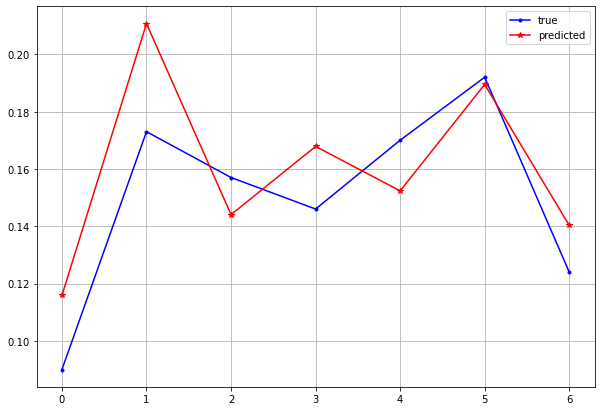

In [32]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test.shape[0]),y_test[:,0],c='b',marker='.',label='true')
plt.plot(range(y_test.shape[0]),liner_single.predict(X_test),c='r',marker='*',label='predicted')
plt.grid(),plt.legend()
plt.show()

### tree

In [33]:
# make model for single output 
from sklearn.tree import DecisionTreeRegressor
# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# calculations
# MSE = (sum_square_of_left / w_l) + (sum_square_of_right / w_r)
# FriedmanMSE = (w_r * total_left_sum - w_l * total_rigth_sum)**2 / (w_r * w_l)

# make model - un-norm
tree_single=DecisionTreeRegressor(criterion='friedman_mse',random_state=7)#friedman_mse- making model for decision tree
# train model 
tree_single.fit(X_train,y_train[:,0])
print('error single-outputs un-norm:',mean_absolute_error(y_test[:,0],tree_single.predict(X_test)))

# make model - norm
ntree_single=DecisionTreeRegressor(criterion='friedman_mse',random_state=7)
# train model 
ntree_single.fit(nX_train,ny_train[:,0])
print('error single-outputs norm',mean_absolute_error(ny_test[:,0],ntree_single.predict(nX_test))*norms_of_y[0])

error single-outputs un-norm: 0.011428571428571423
error single-outputs norm 0.009142857142857128


#### visualize

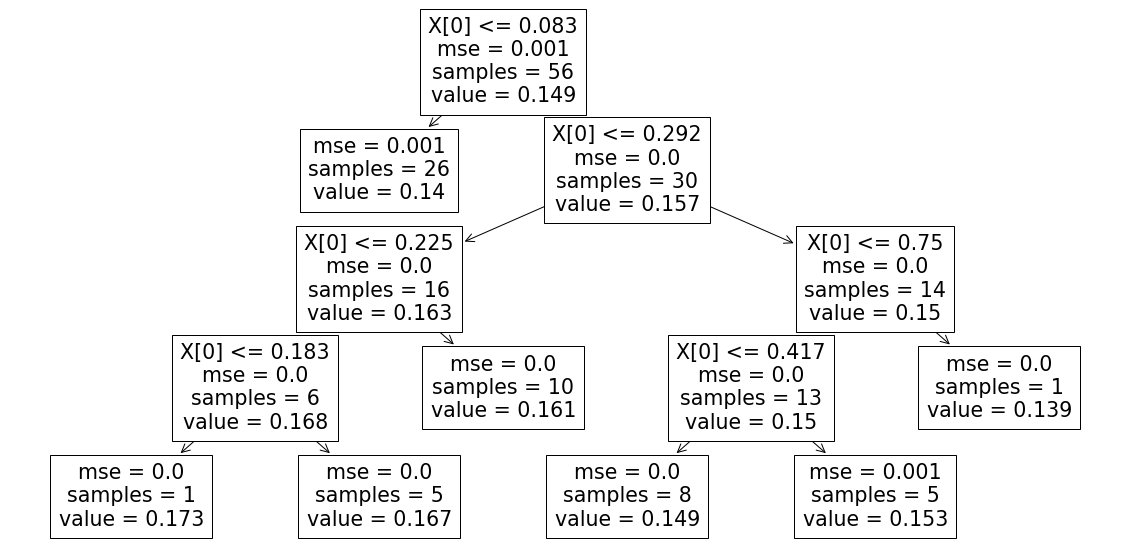

In [35]:
# make model for single output 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
sample_tree_single=DecisionTreeRegressor(max_depth=7).fit(X_train[:,0].reshape(-1,1),y_train[:,0])
plot_tree(sample_tree_single)
plt.show()

### tree vs linear

In [36]:
print('error linear single-outputs un-norm:',mean_absolute_error(y_test[:,0],liner_single.predict(X_test)))
print('error tree single-outputs un-norm:',mean_absolute_error(y_test[:,0],tree_single.predict(X_test)))
print('absolute difference linear:',y_test[:,0]-liner_single.predict(X_test))
print('absolute difference tree:',y_test[:,0]-tree_single.predict(X_test))
print('absolute difference linear-tree:',liner_single.predict(X_test)-tree_single.predict(X_test))

error linear single-outputs un-norm: 0.019270951142947516
error tree single-outputs un-norm: 0.011428571428571423
absolute difference linear: [-0.02585069 -0.03771539  0.01296044 -0.02185498  0.01766048  0.00254028
 -0.01631441]
absolute difference tree: [-0.003  0.003  0.019  0.008 -0.025  0.008 -0.014]
absolute difference linear-tree: [ 0.02285069  0.04071539  0.00603956  0.02985498 -0.04266048  0.00545972
  0.00231441]


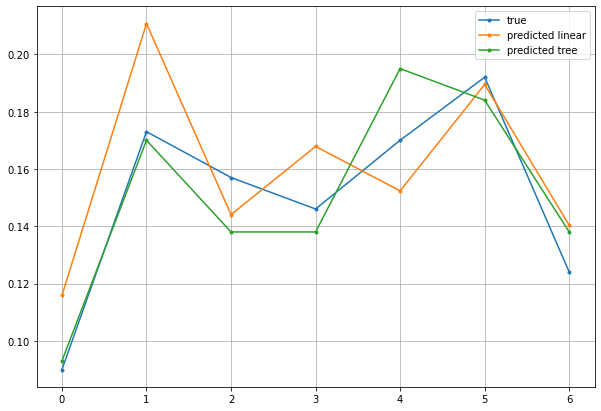

In [37]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test.shape[0]),y_test[:,0],marker='.',label='true')
plt.plot(range(y_test.shape[0]),liner_single.predict(X_test),marker='.',label='predicted linear')
plt.plot(range(y_test.shape[0]),tree_single.predict(X_test),marker='.',label='predicted tree')
plt.grid(),plt.legend()
plt.show()

### improving tree

In [24]:
# make model for single output - Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# make model - un-norm
gboost_tree_single=GradientBoostingRegressor(learning_rate=0.1,criterion='friedman_mse')
# train model 
gboost_tree_single.fit(X_train,y_train[:,0])
print('error Gradient Boosting Regressor-outputs un-norm:',mean_absolute_error(y_test[:,0],gboost_tree_single.predict(X_test)))

# make model for single output - 
from sklearn.ensemble import RandomForestRegressor
# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# make model - un-norm
forest_single=RandomForestRegressor(criterion='friedman_mse')
# train model 
forest_single.fit(X_train,y_train[:,0])
print('error Forest Regressor-outputs un-norm:',mean_absolute_error(y_test[:,0],forest_single.predict(X_test)))

error Gradient Boosting Regressor-outputs un-norm: 0.007556044327352208
error Forest Regressor-outputs un-norm: 0.012448571428571458


In [25]:
print('error Gradient Boosting Regressor-outputs un-norm:',mean_absolute_error(y_test[:,0],gboost_tree_single.predict(X_test)))
print('error tree single-outputs un-norm:',mean_absolute_error(y_test[:,0],tree_single.predict(X_test)))
print('error linear single-outputs un-norm:',mean_absolute_error(y_test[:,0],liner_single.predict(X_test)))
print('Gradient Boosting Regressor score:',gboost_tree_single.score(X_test,y_test[:,0]))
print('tree score:',tree_single.score(X_test,y_test[:,0]))
print('linear score:',liner_single.score(X_test,y_test[:,0]))

error Gradient Boosting Regressor-outputs un-norm: 0.007556044327352208
error tree single-outputs un-norm: 0.008714285714285706
error linear single-outputs un-norm: 0.019270951142947357
Gradient Boosting Regressor score: 0.9056047979961279
tree score: 0.8849778608278833
linear score: 0.5278509157028535


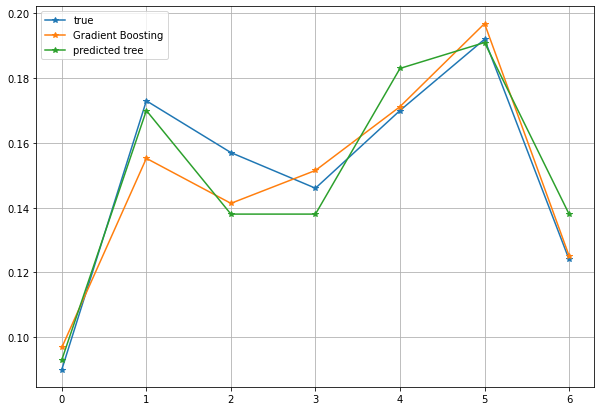

In [27]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test.shape[0]),y_test[:,0],marker='*',label='true')
plt.plot(range(y_test.shape[0]),gboost_tree_single.predict(X_test),marker='*',label='Gradient Boosting')
plt.plot(range(y_test.shape[0]),tree_single.predict(X_test),marker='*',label='predicted tree')
plt.grid(),plt.legend()
plt.show()

# get me the real ---

source: https://datahub.io/core/s-and-p-500-companies-financials

In [57]:
# data source
data_link='https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv'

# load data
snp_500=pd.read_csv(data_link)
snp_500.head(3)
#EBITDA, or earnings before interest, taxes, depreciation, and amortization

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [58]:
snp_500.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [59]:
rename_dict_500={'Symbol':'symbol','Name':'name','Sector':'sector',
                 'Price':'price','Price/Earnings':'profit','Dividend Yield':'divident',
                 'Earnings/Share':'earning_share','52 Week Low':'low','52 Week High':'high',
                 'Market Cap':'market_cap','EBITDA':'ebitda','Price/Sales':'price_sales',
                 'Price/Book':'book_price','SEC Filings':'links'}

# rename columns 
mdf_snp_500=snp_500.rename(columns=rename_dict_500)
# drop - name,links
mdf_snp_500.drop(columns=['name','links'],inplace=True)
mdf_snp_500.head(3)

,symbol,sector,price,profit,divident,earning_share,low,high,market_cap,ebitda,price_sales,book_price
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19


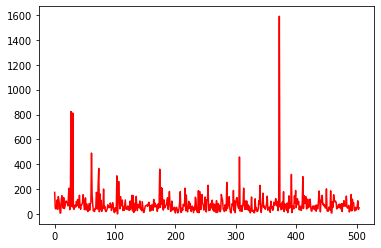

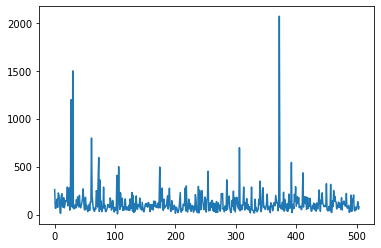

In [60]:
mdf_snp_500.high.plot(c='r')
plt.show()
mdf_snp_500.low.plot()

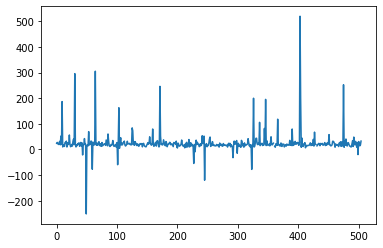

In [61]:
mdf_snp_500.profit.plot()

In [62]:
mdf_snp_500.isna().sum()

symbol           0
sector           0
price            0
profit           2
divident         0
earning_share    0
low              0
high             0
market_cap       0
ebitda           0
price_sales      0
book_price       8
dtype: int64

In [63]:
mdf_snp_500[mdf_snp_500.ebitda==0].shape

(58, 12)

In [64]:
foo_sample=mdf_snp_500[(mdf_snp_500.price/mdf_snp_500.profit)>3]
sample_data=[(foo_sample.price/foo_sample.profit)>5]

In [65]:
# drop null values containing columns 
mdf_snp_500.dropna(axis=0,how='any',inplace=True)
# select data
sample_data=mdf_snp_500[(mdf_snp_500.price/mdf_snp_500.profit)>3]
#sample_data=mdf_snp_500.copy()
print(sample_data.shape)

(308, 12)


In [66]:
# info
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 502
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         308 non-null    object 
 1   sector         308 non-null    object 
 2   price          308 non-null    float64
 3   profit         308 non-null    float64
 4   divident       308 non-null    float64
 5   earning_share  308 non-null    float64
 6   low            308 non-null    float64
 7   high           308 non-null    float64
 8   market_cap     308 non-null    int64  
 9   ebitda         308 non-null    float64
 10  price_sales    308 non-null    float64
 11  book_price     308 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 31.3+ KB


In [29]:
# count each type in sector
sample_data.sector.value_counts()

Consumer Discretionary        30
Information Technology        27
Financials                    24
Energy                        23
Industrials                   19
Health Care                   14
Utilities                     14
Real Estate                   12
Consumer Staples              12
Materials                     10
Telecommunication Services     2
Name: sector, dtype: int64

### prediction 

In [38]:
mdf_snp_500.columns

Index(['symbol', 'sector', 'price', 'profit', 'divident', 'earning_share',
       'low', 'high', 'market_cap', 'ebitda', 'price_sales', 'book_price'],
      dtype='object')

In [81]:
# x-data - ['low','high','market_cap','ebitda','price_sales','book_price']
X_500=sample_data.loc[:,mdf_snp_500.columns[-6:-4]].values 
# y-labels - ['price','profit']
y_500=sample_data.loc[:,['price','profit']].values

# normalize 
X_500_norm,norms_of_x_500=normalize(X_500,norm='l2',axis=0,copy=True,return_norm=True)
y_500_norm,norms_of_y_500=normalize(y_500,norm='l2',axis=0,copy=True,return_norm=True)

# split data 
X_train_500,X_test_500,y_train_500,y_test_500=train_test_split(X_500_norm,y_500_norm,test_size=0.10,random_state=8)

X_train_500.shape,X_test_500.shape,y_train_500.shape,y_test_500.shape

ValueError: ignored

In [68]:
# make model - un-norm
gboost_tree_500=GradientBoostingRegressor(learning_rate=0.05,criterion='mse',random_state=10)
# train model 
gboost_tree_500.fit(X_train_500,y_train_500[:,1])
print('error Gradient Boosting Regressor-outputs un-norm:',
      mean_absolute_error(y_test_500[:,1],gboost_tree_500.predict(X_test_500),multioutput='raw_values')*norms_of_y_500[1])

# scoure https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error

print('error Gradient Boosting Regressor-outputs un-norm:',
      mean_squared_error(y_test_500[:,1],gboost_tree_500.predict(X_test_500),multioutput='raw_values')*norms_of_y_500[1])

error Gradient Boosting Regressor-outputs un-norm: [3.85639631]
error Gradient Boosting Regressor-outputs un-norm: [0.05142563]


In [ ]:
error Gradient Boosting Regressor-outputs un-norm: [3.85639631]
error Gradient Boosting Regressor-outputs un-norm: [0.05142563]

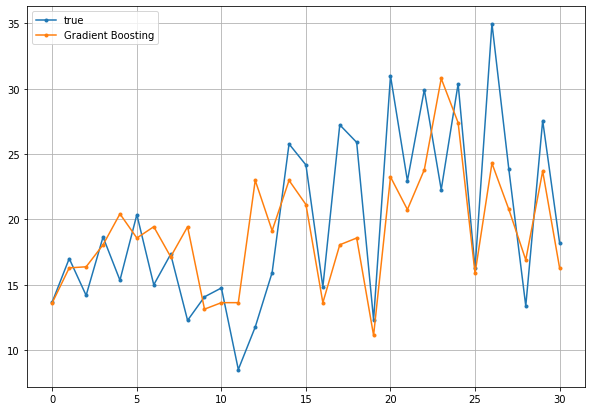

In [69]:
# plot 
plt.figure(figsize=(10,7))
plt.plot(range(y_test_500.shape[0]),y_test_500[:,1]*norms_of_y_500[1],marker='.',label='true')
plt.plot(range(y_test_500.shape[0]),gboost_tree_500.predict(X_test_500)*norms_of_y_500[1],marker='.',label='Gradient Boosting')
plt.grid(),plt.legend()
plt.show()

In [74]:
from sklearn.feature_selection import RFE

sample_tester_rfe=GradientBoostingRegressor()

f_selector=RFE(sample_tester_rfe,n_features_to_select=2,step=1)

f_selector.fit(X_500_4_cv,y_500_4_cv[:,1])

RFE(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                        criterion='friedman_mse', init=None,
                                        learning_rate=0.1, loss='ls',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_iter_no_change=None,
                                        presort='deprecated', random_state=None,
                                        subsample=1.0, tol=0.0001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
    n_f

In [75]:
f_selector.n_features_to_select

2

In [76]:
f_selector.support_

array([ True, False, False, False, False,  True])

In [77]:
f_selector.ranking_

array([1, 3, 4, 5, 2, 1])

### super test model 

In [71]:
# x-data - ['low','high','market_cap','ebitda','price_sales','book_price']
X_500=sample_data.loc[:,mdf_snp_500.columns[-6:]].values 
# y-labels - ['price','profit']
y_500=sample_data.loc[:,['price','profit']].values

# normalize 
X_500_4_cv,norms_of_x_500=normalize(X_500,norm='l2',axis=0,copy=True,return_norm=True)
y_500_4_cv,norms_of_y_500=normalize(y_500,norm='l2',axis=0,copy=True,return_norm=True)

In [82]:
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import cross_validate,KFold,GridSearchCV
# source - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
from sklearn.feature_selection import RFE


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 7))}]
 

# Test classifier - GradientBoostingRegressor
test_clf_GradientBoostingRegressor=GradientBoostingRegressor(learning_rate=0.05,criterion='mse')
test_clf_GradientBoostingRegressor.fit(X_500_4_cv,y_500_4_cv[:,1])

# set up GridSearchCV()
model_f_select = GridSearchCV(estimator = RFE(test_clf_GradientBoostingRegressor),param_grid = hyper_params, 
                              scoring= 'r2', cv = folds, verbose = 1, return_train_score=True) 

# fit the model
model_f_select.fit(X_500_4_cv,y_500_4_cv[:,1])                  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=GradientBoostingRegressor(alpha=0.9,
                                                               ccp_alpha=0.0,
                                                               criterion='mse',
                                                               init=None,
                                                               learning_rate=0.05,
                                                               loss='ls',
                                                               max_depth=3,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                    

In [79]:
# cv results
results_ = pd.DataFrame(model_f_select.cv_results_)
results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.295832,0.005743,0.000925,0.000125,1,{'n_features_to_select': 1},0.247774,-34.227304,0.028676,0.269344,0.146884,-6.706925,13.760454,1,0.916926,0.922350,0.636357,0.923640,0.937469,0.867348,0.115694
1,0.257778,0.006604,0.000880,0.000167,2,{'n_features_to_select': 2},0.482688,-45.850642,0.052856,0.261039,0.137120,-8.983388,18.434195,6,0.943579,0.930349,0.772454,0.924944,0.941744,0.902614,0.065450
2,0.214136,0.002734,0.000885,0.000059,3,{'n_features_to_select': 3},0.461016,-35.428396,0.065940,0.429331,0.339634,-6.826495,14.301627,2,0.956102,0.950393,0.794558,0.953524,0.964649,0.923845,0.064817
3,0.174698,0.005026,0.000841,0.000009,4,{'n_features_to_select': 4},0.383543,-38.713781,0.040201,0.541122,0.322666,-7.485250,15.615106,4,0.957061,0.958812,0.855961,0.962217,0.967449,0.940300,0.042318
4,0.118561,0.003067,0.000905,0.000130,5,{'n_features_to_select': 5},0.384337,-38.158905,0.041826,0.565559,0.338962,-7.365644,15.397550,3,0.963558,0.962127,0.858411,0.962174,0.968936,0.943041,0.042389
5,0.063728,0.001954,0.000839,0.000008,6,{'n_features_to_select': 6},0.416885,-40.327289,0.058907,0.595592,0.380447,-7.775092,16.277019,5,0.963980,0.962611,0.872599,0.963535,0.969307,0.946406,0.036978


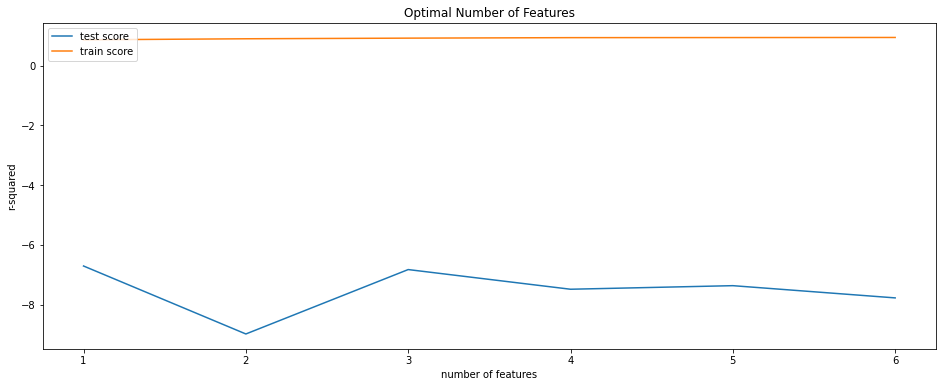

In [80]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(results_["param_n_features_to_select"], results_["mean_test_score"])
plt.plot(results_["param_n_features_to_select"], results_["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [83]:
import seaborn 

In [85]:
d = seaborn.load_dataset('iris')

In [88]:
d.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

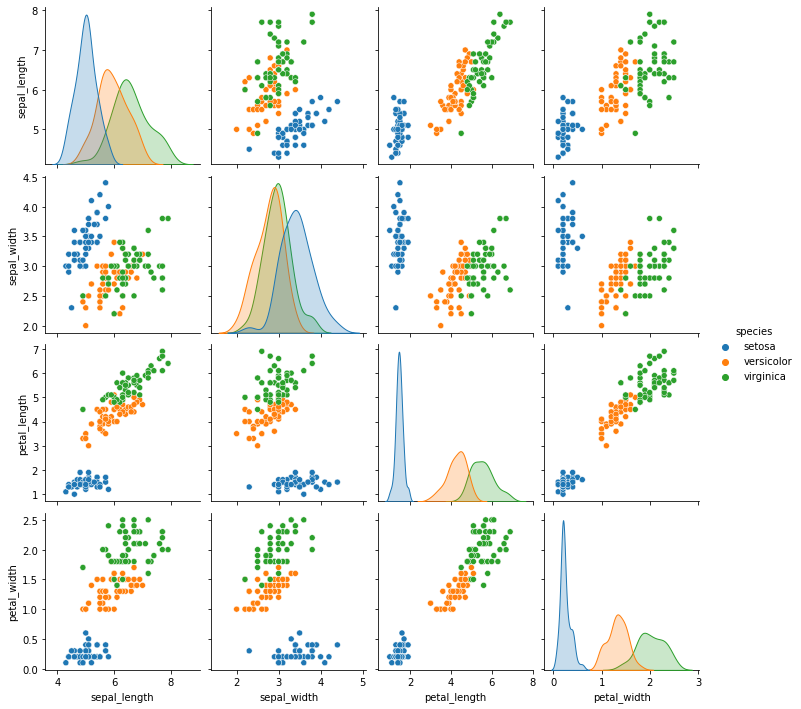

In [89]:
seaborn.pairplot(d,hue='species')